# Linear Regression on the California Housing Dataset
### This project uses Liner Regression to try and predict the median house value within a block
datasource:https://www.kaggle.com/camnugent/california-housing-prices

The data contains the following columns:

* 'longitude': A measure of how far west a house is; a higher value is farther west
* 'latitude': A measure of how far north a house is; a higher value is farther north
* 'housing_median_age': Median age of a house within a block; a lower number is a newer building
* 'total_rooms':  Total number of rooms within a block
* 'total_bedrooms': Total number of bedrooms within a block
* 'population': Total number of people residing within a block
* 'households': Total number of households, a group of people residing within a home unit, for a block
* 'median_income': Median income for households within a block (measured in tens of thousands of US Dollars)
* 'median_house_value': Median house value for households within a block (measured in US Dollars)
* 'ocean_proximity': Location of the house with respect to the ocean/sea

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load and Examine the Data

In [2]:
CAhousing = pd.read_csv('housing.csv')

In [3]:
CAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


***I'm going to convert ocean_proximity Dtype from object to string***

In [4]:
CAhousing['ocean_proximity'] = CAhousing['ocean_proximity'].convert_dtypes()

In [5]:
CAhousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  string 
dtypes: float64(9), string(1)
memory usage: 1.6 MB


In [6]:
CAhousing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
CAhousing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


## Identifying Missing Data
Lets see which columns have missing values.

                    Total  Percent
households              0      NaN
housing_median_age      0      NaN
latitude                0      NaN
longitude               0      NaN
median_house_value      0      NaN
median_income           0      NaN
ocean_proximity         0      NaN
population              0      NaN
total_bedrooms        207      1.0
total_rooms             0      NaN


<AxesSubplot:>

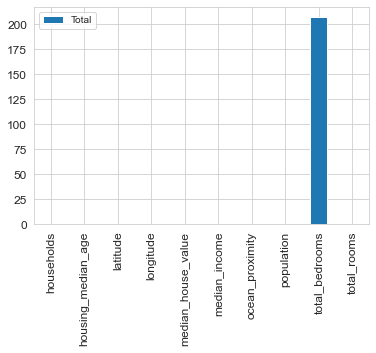

In [8]:
total = CAhousing.isnull().sum().sort_values(ascending=False)
percent = CAhousing.isnull().sum()/total 

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'], sort=True)
print(missing_data)

missing_data.plot(kind='bar',y='Total',figsize=(6,4),fontsize=12)

## Data Cleaning

I want to fill in missing total_bedroom data instead of just dropping the missing total_bedroom data rows. One way to do this is by using simple imputation.

In [9]:
imputer = SimpleImputer(strategy='median')
imputer = imputer.fit(CAhousing[['total_bedrooms']])
CAhousing['total_bedrooms'] = imputer.transform(CAhousing[['total_bedrooms']])

I also want to convert the ocean_proximity into categorical features using one hot encoding

In [10]:
CAhousing = pd.concat([CAhousing,pd.get_dummies(CAhousing['ocean_proximity'])],axis =1)
CAhousing.drop('ocean_proximity',axis =1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


total_rooms, total_bedrooms, and population are total values for an entire block. In order to estimate values for each individual household, I'll need to derive new attributes from the existing attributes in our dataset.

In [11]:
CAhousing['avg_rooms_household'] = CAhousing['total_rooms']/CAhousing['households']
CAhousing['avg_bedrooms_household'] = CAhousing['total_bedrooms']/CAhousing['households']
CAhousing['avg_population_household'] = CAhousing['population']/CAhousing['households']

## EDA
Create a few simple plots to explore the data

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'<1H OCEAN'}>,
        <AxesSubplot:title={'center':'INLAND'}>,
        <AxesSubplot:title={'center':'ISLAND'}>],
       [<AxesSubplot:title={'center':'NEAR BAY'}>,
        <AxesSubplot:title={'center':'NEAR OCEAN'}>,
        <AxesSubplot:title={'center':'avg_rooms_household'}>,
        <AxesSubplot:title={'center':'avg_bedrooms_household'}>],
       [<AxesSubplot:title={'center':'avg_population_household'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubpl

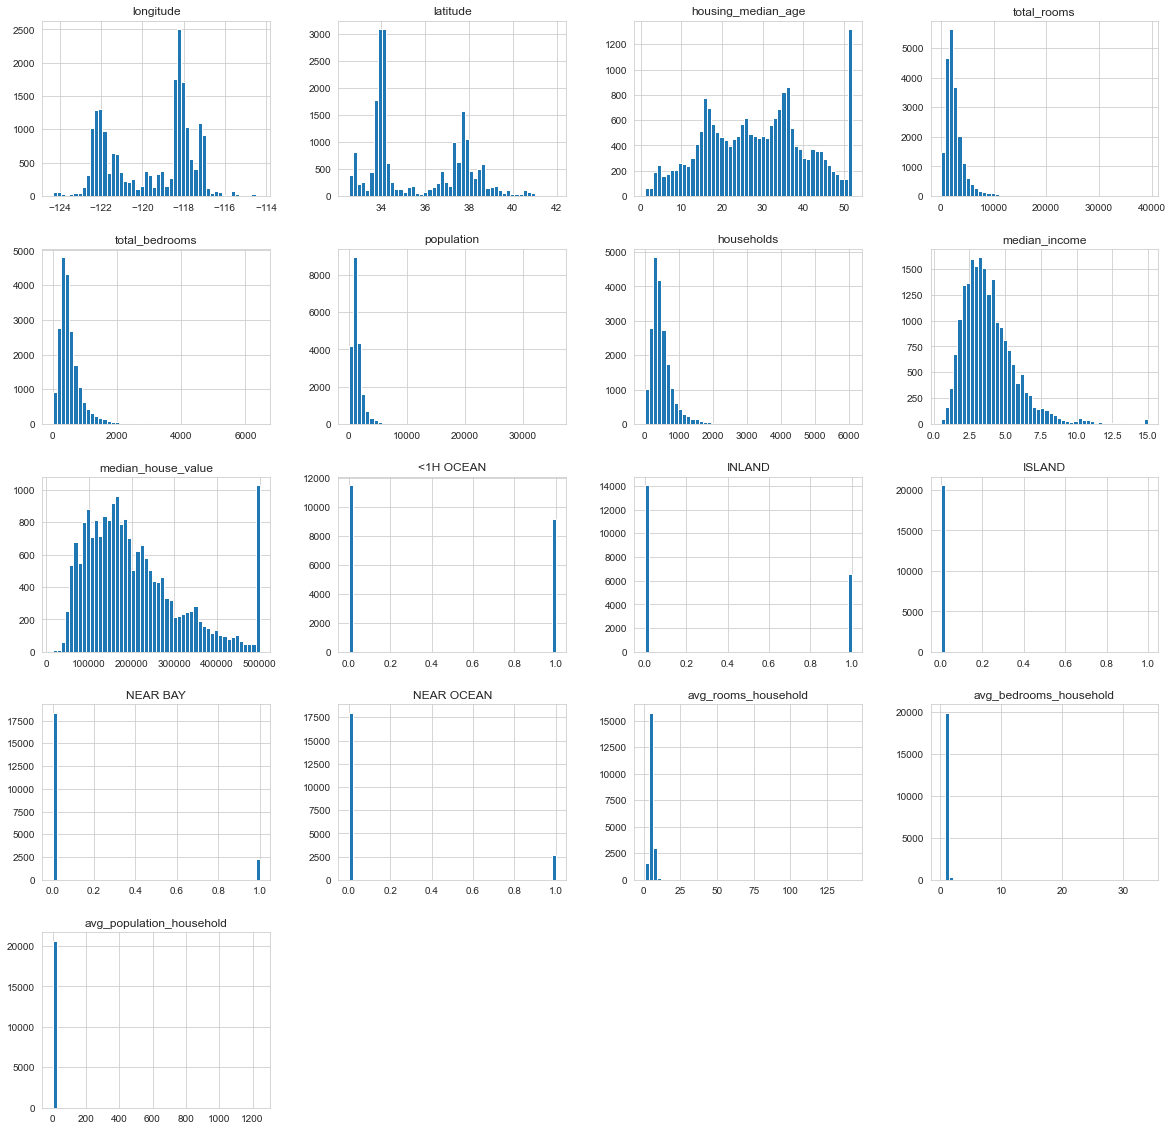

In [12]:
CAhousing.hist(bins=50, figsize=(20,20))

**The following geographical data visualization shows the median house value in relation to location and population density.**

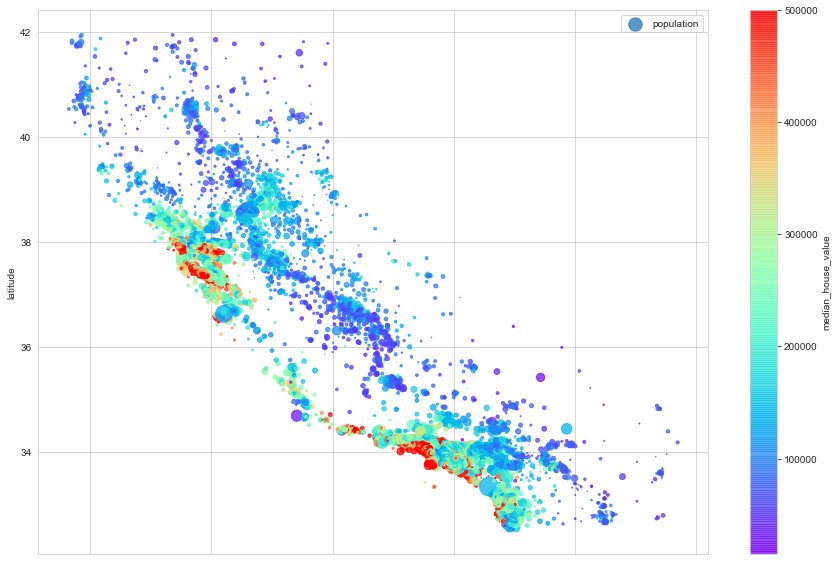

In [13]:
CAhousing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.75,
            s=CAhousing['population']/100, label='population',
            c='median_house_value', cmap=plt.get_cmap('rainbow'), colorbar=True,
            figsize=(15,10))
plt.legend()

***Through this visualization, I can identify some clear hotspots where the meadian house value is significantly higher such as the San Francisco Bay Area and Los Angeles***

## Correlation
I visualize and analyze the correlation between the data features using a heat map

<AxesSubplot:>

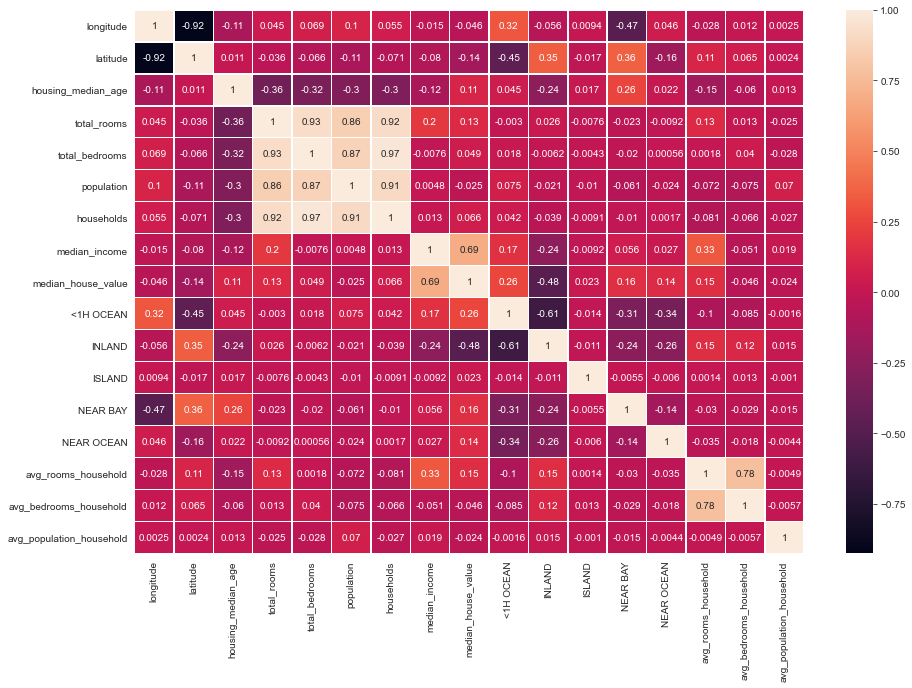

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(CAhousing.corr(), annot=True, linewidths=.5, ax=ax)

In [15]:
CAhousing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
<1H OCEAN                   0.256617
NEAR BAY                    0.160284
avg_rooms_household         0.151948
NEAR OCEAN                  0.141862
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
ISLAND                      0.023416
avg_population_household   -0.023737
population                 -0.024650
avg_bedrooms_household     -0.045637
longitude                  -0.045967
latitude                   -0.144160
INLAND                     -0.484859
Name: median_house_value, dtype: float64

***Analyzing these coefficients, it is clear that median income (r=0.69) has a moderately strong uphill (positive) linear relationship with the median house value.***

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

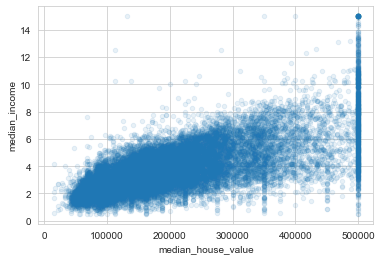

In [16]:
CAhousing.plot(kind="scatter",x="median_house_value",y="median_income",alpha=0.1)

## Training a Linear Regression Model

First I split up the data into an X array that contains the features to train on, and a y array with the target variable, in this case the median_house_value column.

**X and y arrays**

In [17]:
X = CAhousing[['housing_median_age', 'avg_rooms_household', 'avg_bedrooms_household', 
               'avg_population_household', 'households', 'median_income', '<1H OCEAN', 
               'NEAR BAY', 'NEAR OCEAN', 'INLAND']]
y = CAhousing['median_house_value']

## Train Test Split

Then I split the data into a training set and a testing set

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## Create and Train the Model

In [19]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [20]:
lm.score(X_train,y_train)

0.6119321310385284

## Evaluate the Model
I take a look at the coefficients to see how they can be interpreted

In [21]:
# print the intercept
print(lm.intercept_)

221496.90606414335


In [22]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
housing_median_age,1248.361927
avg_rooms_household,-2100.851118
avg_bedrooms_household,13149.498470
avg_population_household,-849.383788
households,26.034489
median_income,39911.371795
<1H OCEAN,-201253.753604
NEAR BAY,-188858.454654
NEAR OCEAN,-182754.742734
INLAND,-268204.240114


Interpreting the coefficients for **Median House Value**:

Holding all other features fixed, a 1 unit increase in **Household Median Age** is associated with an **increase of \$1,248.36**

Holding all other features fixed, a 1 unit increase in **Average Rooms/Household** is associated with a ***decrease of \$2,100.85***

Holding all other features fixed, a 1 unit increase in **Average Bedrooms/Household** is associated with an **increase of \$13,149.50**

Holding all other features fixed, a 1 unit increase in **Average Population/Household** is associated with a ***decrease of \$849.39***

Holding all other features fixed, a 1 unit increase in **Total Households** is associated with an **increase of \$26.03**

Holding all other features fixed, a 1 unit increase in **Area Median Income** is associated with an **increase of \$39,911.37**

## Making Predictions from the Model

In [23]:
predictions = lm.predict(X_test)

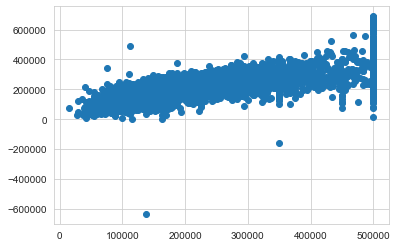

In [24]:
plt.scatter(y_test, predictions)

## Regression Evaluation Metrics


Comparing these metrics:

- **Mean Absolute Error (MAE)** is the easiest to understand, because it's the average error.
- **Mean Squared Error (MSE)** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **Root Mean Squared Error (RMSE)** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 53402.829327998676
MSE: 5634015810.872877
RMSE: 75060.08134070251


## Conclusions

***The median income for a block stands out as the number one predictor of median house value for that block. This is supported by the fact that there is a uphill (positive) linear relationship between median income and median house value.***